# Aufgabe 11.1

Das Bundesamt für Statistik stellt eine sehr grosse Anzahl von Datensätzen auf ihrer Webseite zur Verfügung. Mit Hilfe des Tools `STAT-TAB` ist es relativ einfach, nach bestimmten Datensätze Ausschau zu halten and spezifische Tabellen herunterzuladen und individuell zusammenzustellen.

**a) Besuchen Sie die Webseite https://www.bfs.admin.ch/bfs/en/home/services/recherche/stat-tab-online-data-search.html und versuchen Sie, mit dem Datenbrowser zurechtzukommen.**

> [Guideline for online data search](https://www.bfs.admin.ch/bfs/en/home/services/recherche/stat-tab-online-data-search.assetdetail.314535.html)

**b) Die Mehrzahl der Datensätze auf dieser Webseite beinhalten tatsächlich Zeitreihen.
Versuchen Sie die Zeitreihe zu finden,welche die Anzahl Elektro-Personenwagen (PW) von 1990 - 2017 enthält (separat für jeden Kanton). Laden Sie die entsprechende Tabelle als .csv Datei herunter.**

Link: [Strassenfahrzeugbestand](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1103020100_101/-/px-x-1103020100_101.px)

**c) Lesen Sie die Datei in Python ein, und definieren Sie eine Zeitreihe für die
Anzahl Elektro-Autos in Luzern. Erstellen Sie eine Graphik der Zeitreihe.**

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

pw_electric = pd.read_csv('./data/PW_electric.csv', sep=',', skiprows=2,
    header=0, encoding = "utf-8", index_col=0)
pw_electric.head()

,Treibstoff,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Kanton,,,,,,,,,,,,,,,,,,,,,
Zürich,Electricity,64,120,161,153,153,150,139,131,121,...,32,42,150,211,428,737,1201,2201,2855,3743
Bern / Berne,Electricity,75,130,132,134,113,113,108,101,99,...,42,42,46,108,177,269,428,682,971,1343
Luzern,Electricity,12,21,25,24,23,20,21,18,14,...,5,3,10,38,79,118,196,350,530,719
Uri,Electricity,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,5,10,12,22,29
Schwyz,Electricity,1,5,7,8,9,10,11,11,12,...,0,2,7,15,37,54,112,195,292,387


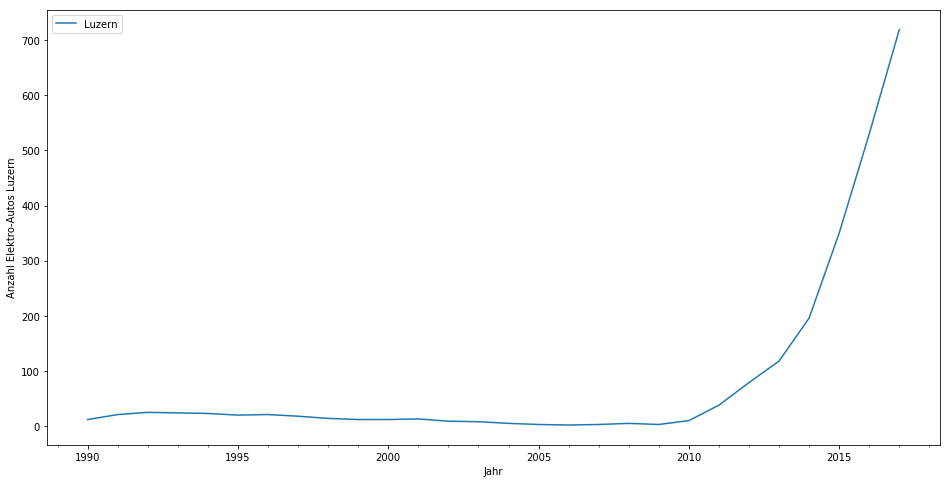

In [15]:
pw_electric_luzern = DataFrame(pw_electric.loc["Luzern",'1990':'2017'])
pw_electric_luzern["Year"] = pd.DatetimeIndex(pw_electric_luzern.index)

pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()

**d) Wiederholen Sie die Vorgehensweise aus Teilaufgabe (c) für den Kanton Zürich.**

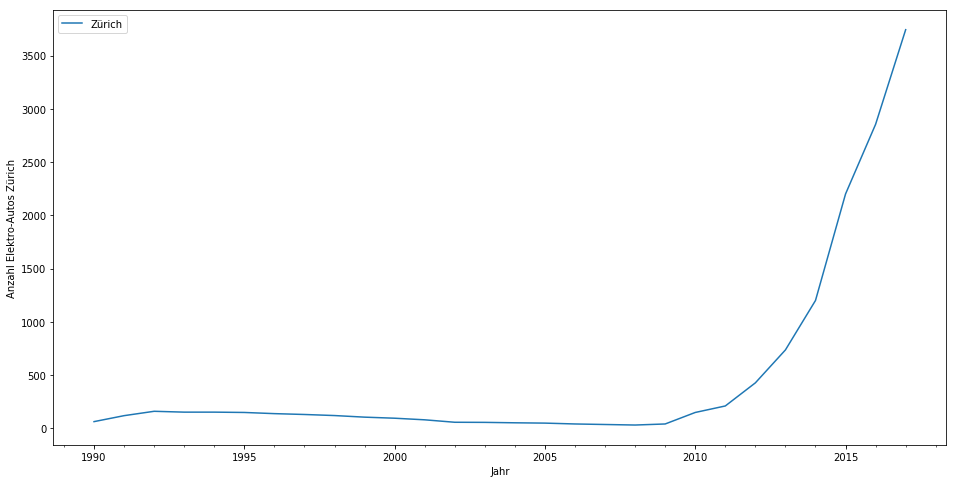

In [18]:
pw_electric_zurich = DataFrame(pw_electric.loc["Zürich",'1990':'2017'])
pw_electric_zurich["Year"] = pd.DatetimeIndex(pw_electric_zurich.index)

pw_electric_zurich.set_index("Year", inplace=True)
pw_electric_zurich.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Zürich")
plt.show()

**e) Wie können Sie die Daten zwischen den Kantonen Luzern und Zürich korrekt miteinander vergleichen?**

Um die beiden Datensätze vergleichen zu können, müssten die Daten mit der Gesamtzahl Autos normalisiert werden. Falls das nicht möglich ist kann auch der *relative Zuwachs* der Anzahl Elektroautos verglichen werden.

Der relative Zuwachs können wir durch die Differenz der Logarithmen schätzen:

$$log(X_k)-log(X_{k-1})$$

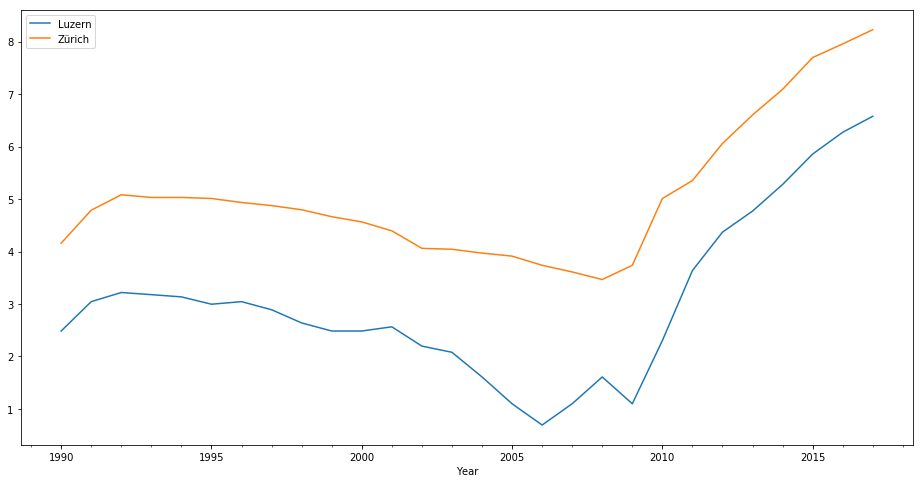

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np

# Relativer Zuwachs in Luzern
pw_electric_luzern["rel"] = np.log(pw_electric_luzern.astype('float'))
- np.log(pw_electric_luzern.shift(1).astype('float'))

# Relativer Zuwachs in Zürich
pw_electric_zurich["rel"] = np.log(pw_electric_zurich.astype('float'))
- np.log(pw_electric_zurich.shift(1).astype('float'))

pw_rel = pd.DataFrame({"Luzern" : pd.Series(pw_electric_luzern["rel"]),
"Zürich" : pd.Series(pw_electric_zurich["rel"])})
pw_rel.plot()
plt.show()

# Aufgabe 11.2

In dieser Aufgabe behandeln wir die vierteljährliche Bierproduktion in Australien.

**a) Lesen Sie die Datei AustralianBeer.csv in Python ein, und konvertieren Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.**

Text(0, 0.5, 'Megalitres Beer')

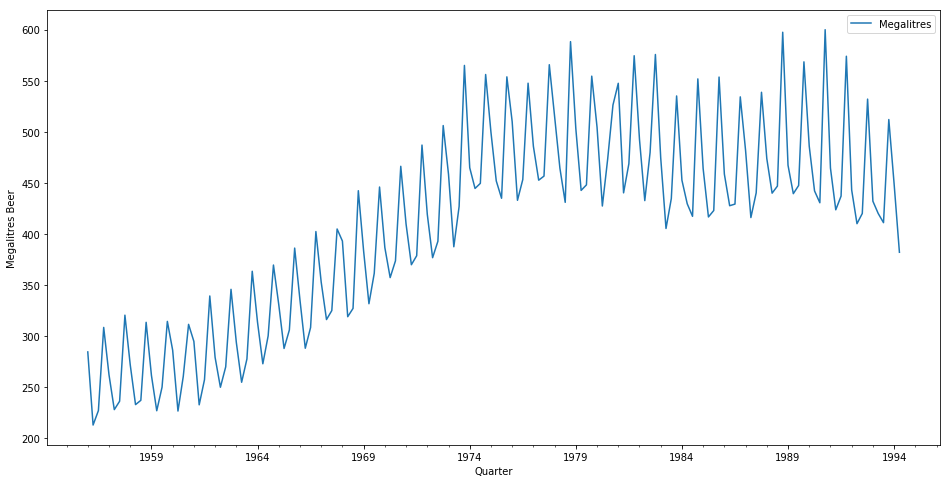

In [20]:
AusBeer = pd.read_csv("./data/AustralianBeer.csv",sep=";",header=0)
AusBeer.head()
AusBeer["Quarter"] = pd.DatetimeIndex(AusBeer["Quarter"])
AusBeer.set_index("Quarter", inplace=True)
AusBeer.columns=["Megalitres"]
AusBeer.head()
AusBeer.describe()
AusBeer.plot()
plt.ylabel("Megalitres Beer")

**b) Zeichnen Sie die aggregierten jährlichen Reihen auf und die Boxplots, welche
die beobachteten Daten imVierteljahr-Zyklus zusammenfassen. Kommentieren
Sie Ihre Beobachtungen der Graphiken.**

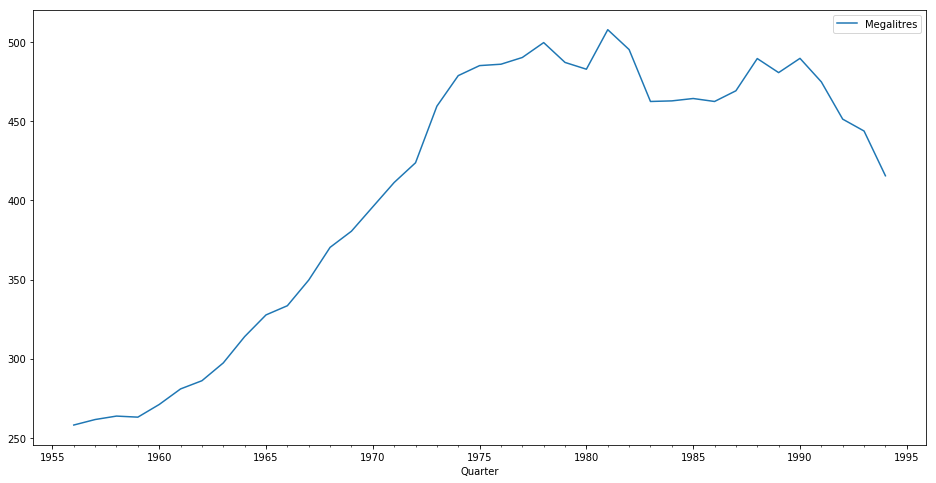

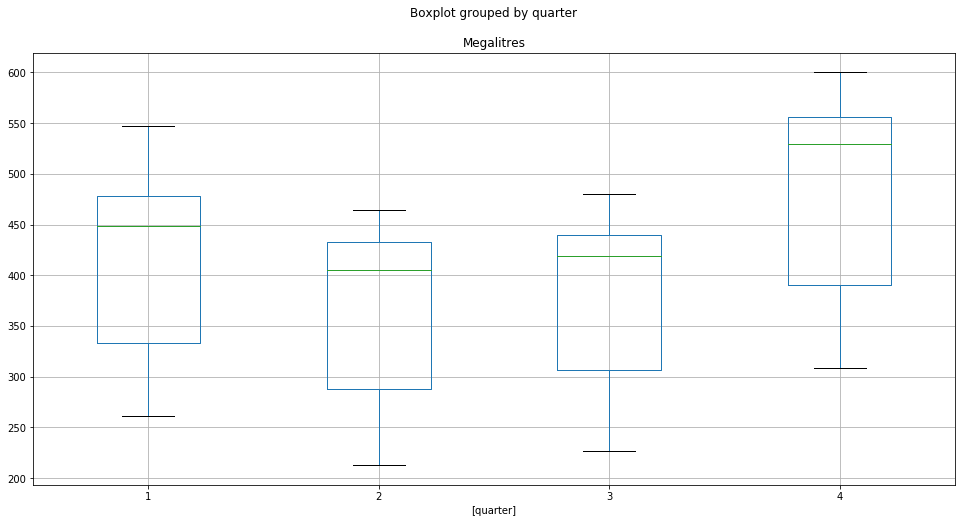

In [21]:
AusBeer.resample("A").mean().plot()
AusBeer['quarter'] = AusBeer.index.quarter
AusBeer.boxplot(by="quarter")

**c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonalen Effekt und Residuen
mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate.
Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?**

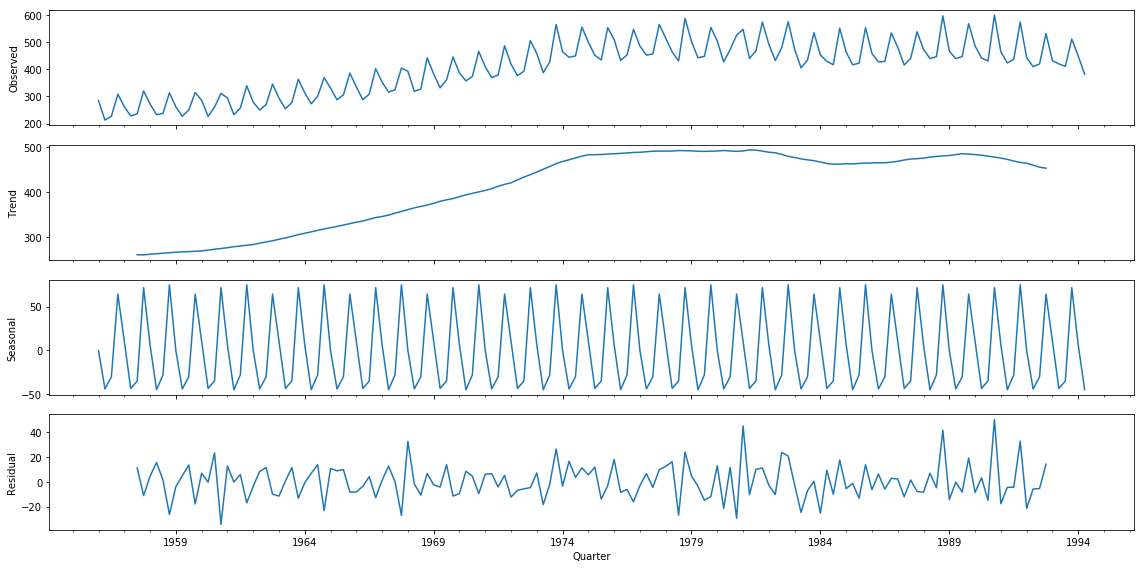

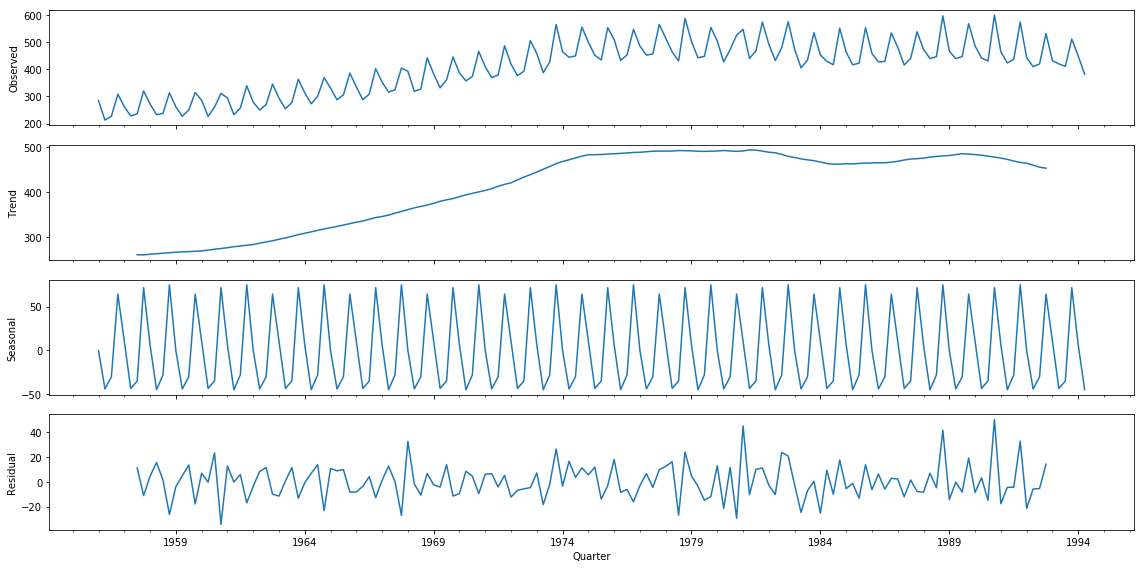

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

AusBeer1 = AusBeer.copy()
seasonal_decompose(AusBeer1['Megalitres'], model="additive", freq=12).plot()

Die saisonalen Effekte sind stabil, für die Zerlegung ist somit keine Transformation nötig.
Beim Restterm (Residual) ist kaum ein Muster mehr zu erkennen.

**d) Zerlegen Sie die Zeitreihe nun mit Hilfe des STL-Verfahrens. Wählen Sie eine
passende Fensterbreite, indem Sie für den Parameter `period=... in decompose()`
den Wert variieren. Vergleichen Sie das Resultat mit dem Resultat in Teilaufgabe
c).**

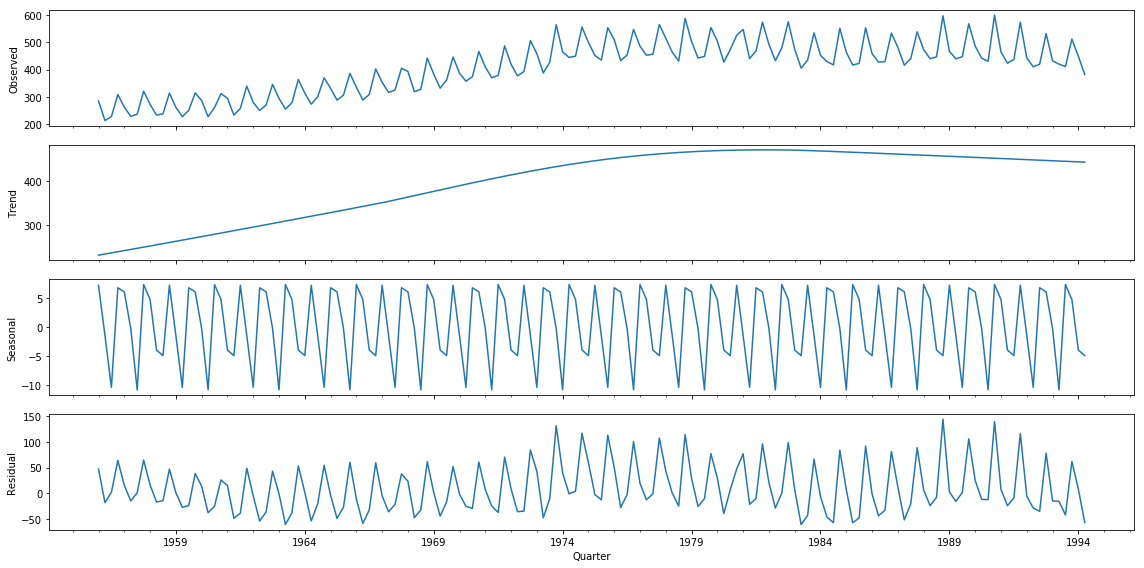

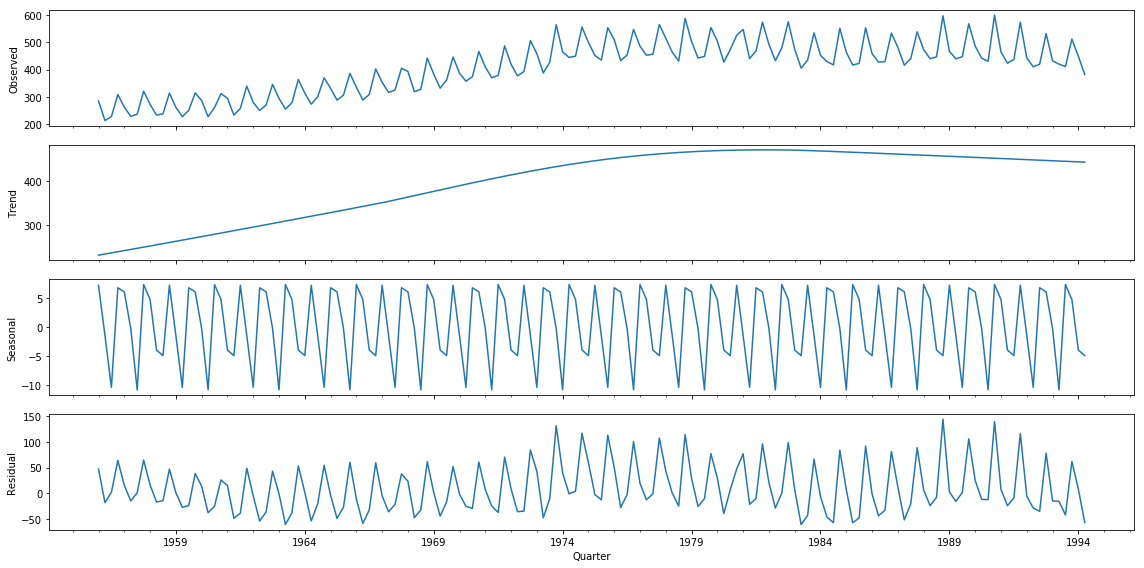

In [44]:
from stldecompose import decompose
AusBeer_stl = decompose(AusBeer["Megalitres"], period=11)
AusBeer_stl.plot()

# Aufgabe 11.3

In dieser Aufgabe behandeln wir die vierteljährliche Produktion von Elektrizität.

**a) Lesen Sie die Datei `AustralianElectricity.csv` in Python ein, und konvertieren
Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.**

Text(0, 0.5, 'Million Kilowatthours')

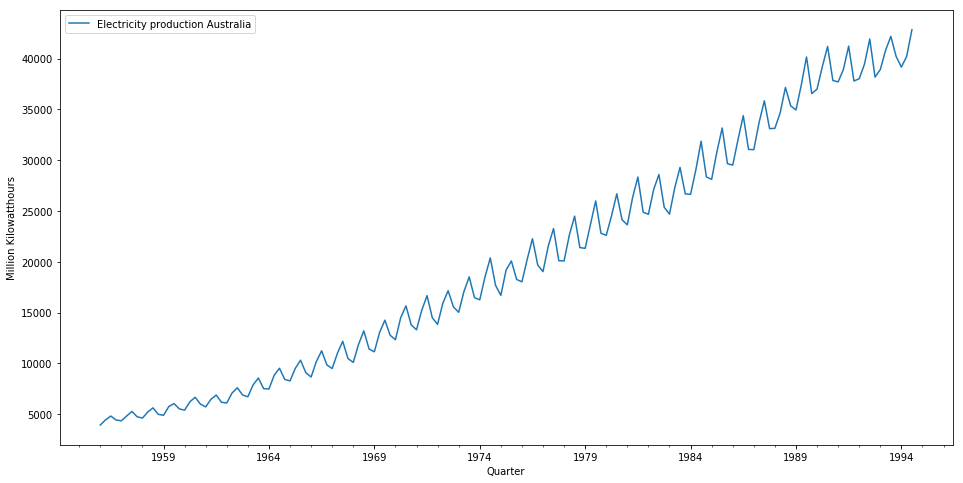

In [47]:
Electricity = pd.read_csv("./data/AustralianElectricity.csv", sep=";", header=0)
Electricity.head()
Electricity["Quarter"] = pd.DatetimeIndex(Electricity["Quarter"])
Electricity.set_index("Quarter", inplace=True)
Electricity.columns=["Electricity production Australia"]
Electricity.head()
Electricity.plot()
plt.ylabel("Million Kilowatthours")

**b) Wenden Sie eine passende Daten-Transformation an, so dass sich die Varianz
der Zeitreihe stabilisiert wird. Hinweis: Wenden Sie die Funktion `box.cox` an,
und bestimmen Sie einen optimalen Wert für `lambda`, indem Sie die Graphik
der transformierten Zeitreihe betrachten.**

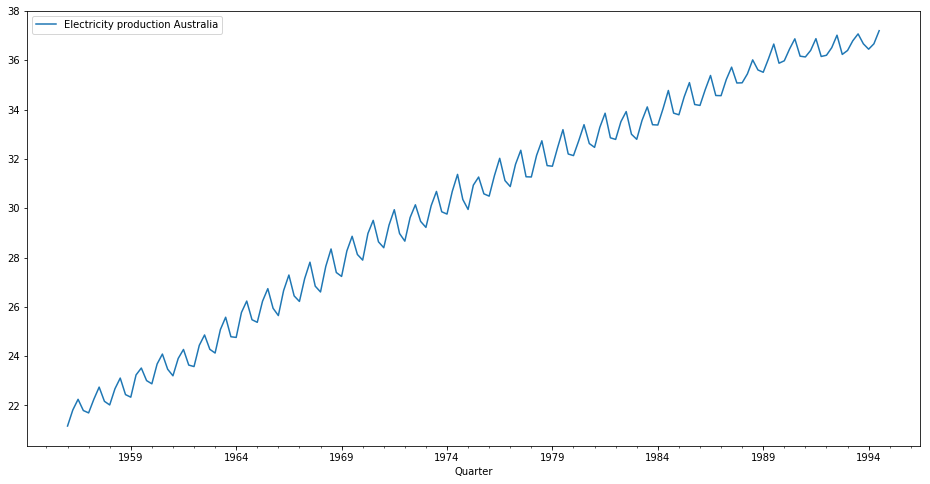

In [65]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
   
Electricity_tr = boxcox(Electricity, 0.2)
Electricity_tr.plot()
plt.show()

**c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonale Effekte und Residuen
mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate.
Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?**

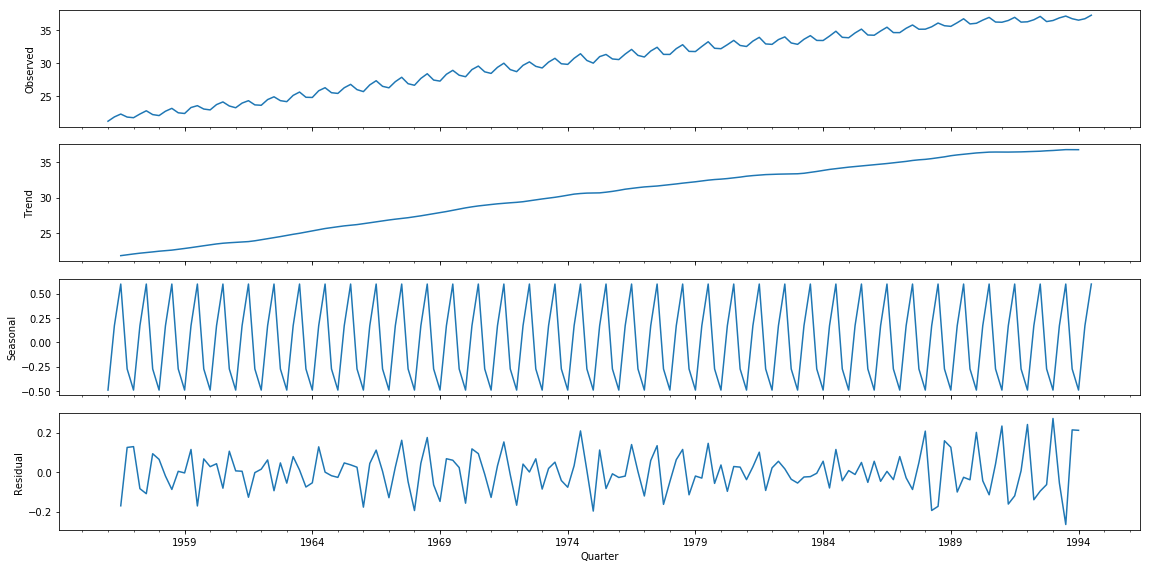

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Electricity_tr, model="additive", freq=4).plot()
plt.show()

* Saisonales Muster erkennbar
* Residual scheint zufällig zu sein

**d) Zerlegen Sie die Zeitreihe erneut, indem Sie die Funktion `decompose()` aus
dem Paket `stldecompose` benützen. Wählen Sie einen geeigneten Wert für
den Parameter `period`. Vergleichen Sie die Resultat emit denjenigen der Teilaufgabe
c).**

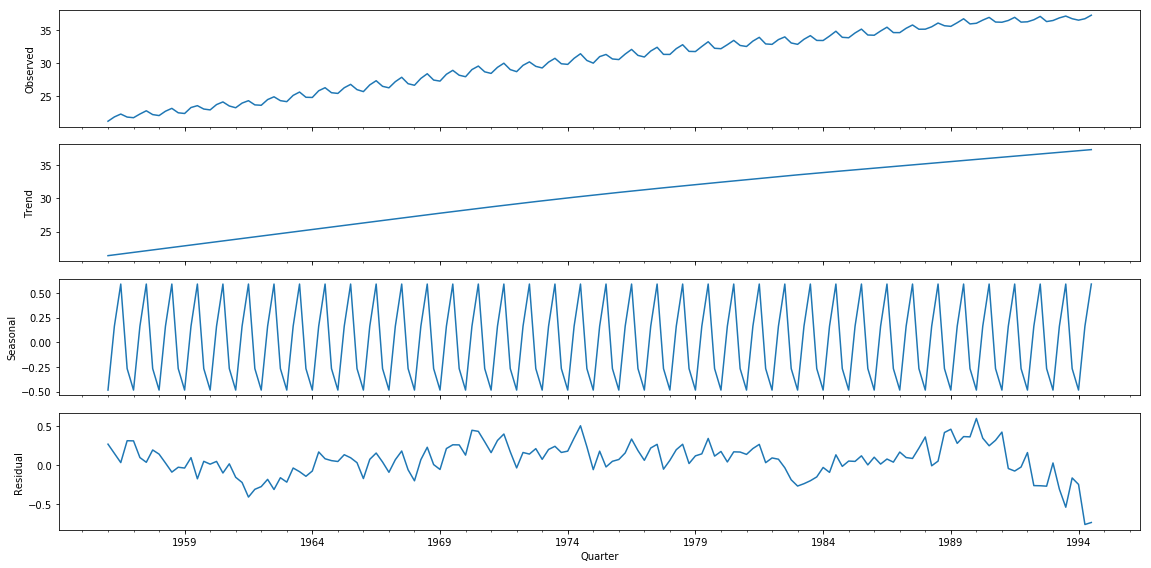

In [71]:
from stldecompose import decompose
Electricity_stl = decompose(Electricity_tr, period=4)
Electricity_stl.plot();

* Residual ist zufällig